In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train.shape

(54808, 14)

In [6]:
test.shape

(23490, 13)

In [7]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [8]:
test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [9]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [11]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

# Missing value

In [12]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [13]:
test.education.value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [14]:
train.education.value_counts()/len(train)*100

Bachelor's          66.904467
Master's & above    27.231426
Below Secondary      1.468764
Name: education, dtype: float64

In [15]:
test.education.value_counts()/len(test)*100

Bachelor's          66.317582
Master's & above    27.688378
Below Secondary      1.592167
Name: education, dtype: float64

66% of employee has the education has Bachelor's degree, so lets update the null value as Bachelor's 

In [16]:
test["education"] = test.education.fillna("Bachelor's")

In [17]:
train["education"] = train.education.fillna("Bachelor's")

Next we have missing value in previous_year_experience

In [18]:
train.previous_year_rating.value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

In [19]:
test.previous_year_rating.value_counts(dropna=False)

3.0    7921
5.0    5097
4.0    4249
1.0    2680
NaN    1812
2.0    1731
Name: previous_year_rating, dtype: int64

When checked the data previous_year_rating is Null for the data whose lenght_of_service is 1, then it would be the first_rating for those employee in our organisation, so we will update those value as 0.

In [20]:
test["previous_year_rating"] = test.previous_year_rating.fillna(0.0)

In [21]:
train["previous_year_rating"] = train.previous_year_rating.fillna(0.0)

In [22]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [23]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

Now we have removed all Null values in both train and test dataset

# Transforming some variable object to binary 

In [24]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [25]:
test.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [26]:
train.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

So for Gender we have 2 value m->male and f->female so we will convert m->1 and f->0

In [27]:
train["gender"] = train.gender.apply(lambda x:0 if x == 'f' else 1)

In [28]:
train.gender.value_counts()

1    38496
0    16312
Name: gender, dtype: int64

In [29]:
test["gender"] = test.gender.apply(lambda x:0 if x == 'f' else 1)

In [30]:
test.gender.value_counts()

1    16596
0     6894
Name: gender, dtype: int64

# Exploratory Data Analysis

In [31]:
train.describe()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,0.702379,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.457216,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,0.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,0.000000,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,1.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [32]:
train.duplicated().sum()   # NO Duplicates found on the train dataset

0

In [33]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                    int64
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

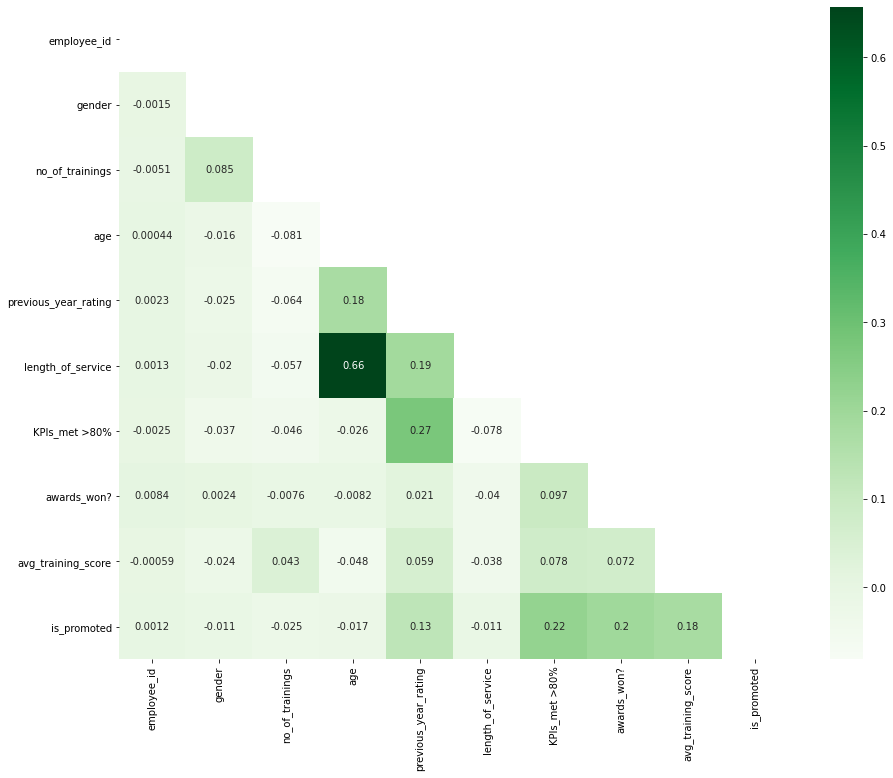

In [34]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='Greens', mask=mask, annot=True);

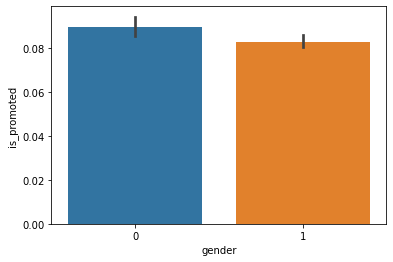

In [35]:
sns.barplot(x='gender', y='is_promoted', data=train)  # gender doen't has any effect to promtion

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

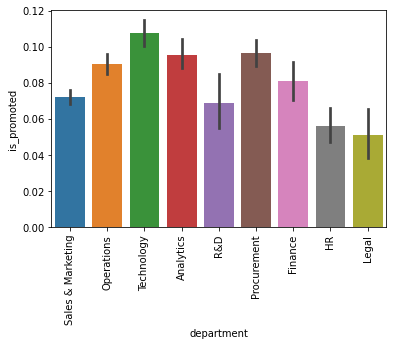

In [36]:
sns.barplot(x='department', y='is_promoted', data=train) 
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text major ticklabel objects>)

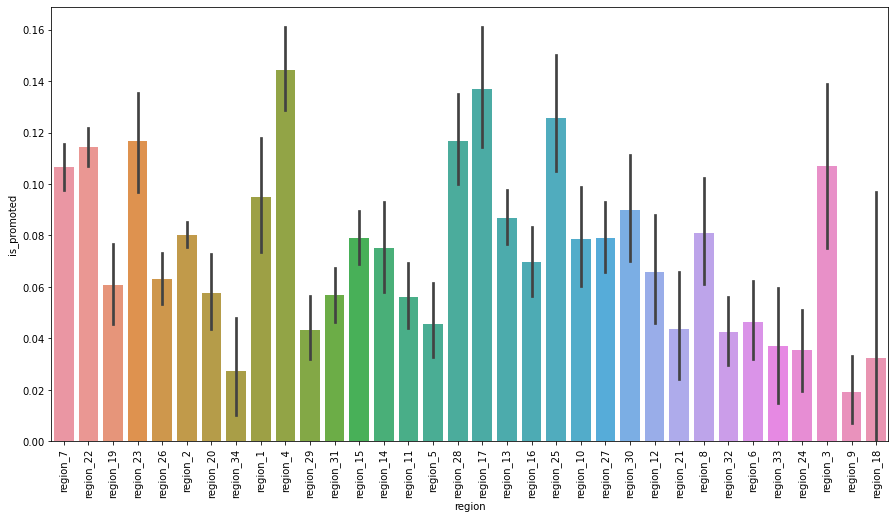

In [37]:
plt.subplots(figsize=(15,8))
sns.barplot(x='region', y='is_promoted', data=train)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

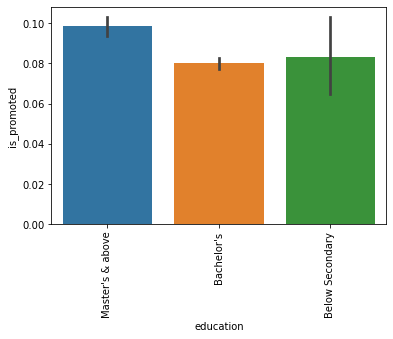

In [38]:
sns.barplot(x='education', y='is_promoted', data=train) 
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

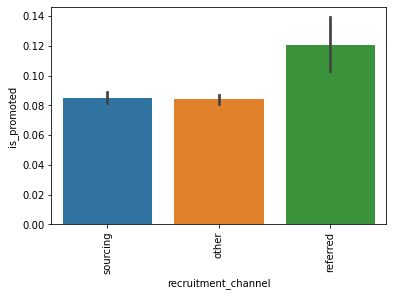

In [39]:
sns.barplot(x='recruitment_channel', y='is_promoted', data=train) 
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

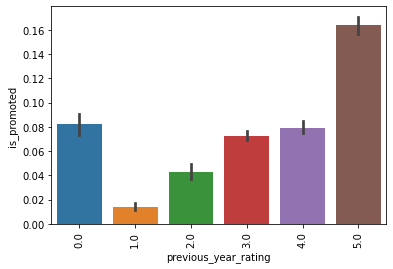

In [40]:
sns.barplot(x='previous_year_rating', y='is_promoted', data=train) 
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

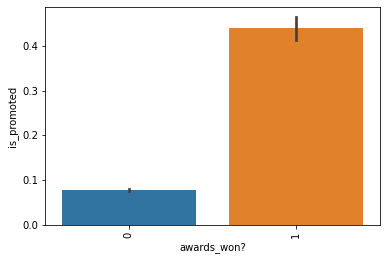

In [41]:
sns.barplot(x='awards_won?', y='is_promoted', data=train) 
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

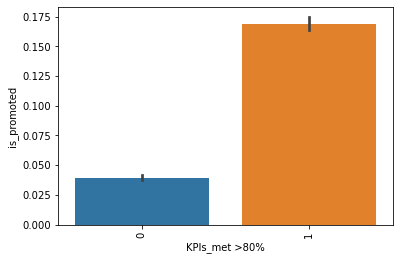

In [42]:
sns.barplot(x='KPIs_met >80%', y='is_promoted', data=train) 
plt.xticks(rotation=90)

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


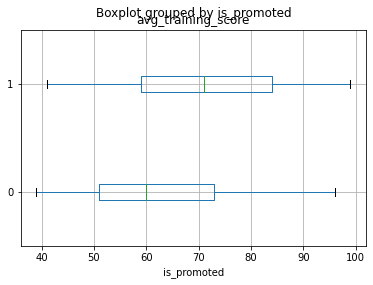

In [43]:
train.boxplot(column='avg_training_score', by='is_promoted', vert=False)

# Dummy Variable

In [44]:
train = pd.get_dummies(train)

In [45]:
train

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0,...,0,1,0,0,0,0,1,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0,...,0,0,0,0,1,0,0,1,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,...,0,0,0,0,1,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0,...,0,0,0,0,1,0,0,1,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,1,1,48,3.0,17,0,0,78,0,...,0,0,0,0,1,0,0,0,0,1
54804,74592,0,1,37,2.0,6,0,0,56,0,...,0,0,0,0,0,0,1,1,0,0
54805,13918,1,1,27,5.0,3,1,0,79,0,...,0,0,0,0,1,0,0,1,0,0
54806,13614,1,1,29,1.0,2,0,0,45,0,...,0,0,0,1,1,0,0,0,0,1


In [46]:
train.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
    

In [47]:
test = pd.get_dummies(test)

In [48]:
test

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,1,1,24,0.0,1,1,0,77,0,...,0,0,0,0,1,0,0,0,0,1
1,74430,0,1,31,3.0,5,0,0,51,0,...,0,0,0,0,1,0,0,1,0,0
2,72255,1,1,31,1.0,4,0,0,47,0,...,0,0,0,0,1,0,0,1,0,0
3,38562,0,3,31,2.0,9,0,0,65,0,...,0,0,0,0,1,0,0,1,0,0
4,64486,1,1,30,4.0,7,0,0,61,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,1,1,24,3.0,1,0,0,61,0,...,0,0,0,0,0,1,0,0,0,1
23486,25600,1,1,31,3.0,7,0,0,74,0,...,0,0,0,0,1,0,0,0,0,1
23487,45409,0,1,26,4.0,4,0,0,50,0,...,0,0,0,0,1,0,0,0,0,1
23488,1186,1,3,27,0.0,1,0,0,70,0,...,0,0,0,0,1,0,0,0,0,1


# Train - Test split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = train.drop(columns=['employee_id','is_promoted'], axis =1)
y = train[['is_promoted']]

In [51]:
test_f = test.drop(columns=['employee_id'], axis =1)

In [52]:
test_f

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,1,24,0.0,1,1,0,77,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,31,3.0,5,0,0,51,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,1,31,1.0,4,0,0,47,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,3,31,2.0,9,0,0,65,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,1,30,4.0,7,0,0,61,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,1,24,3.0,1,0,0,61,0,0,...,0,0,0,0,0,1,0,0,0,1
23486,1,1,31,3.0,7,0,0,74,0,0,...,0,0,0,0,1,0,0,0,0,1
23487,0,1,26,4.0,4,0,0,50,0,0,...,0,0,0,0,1,0,0,0,0,1
23488,1,3,27,0.0,1,0,0,70,0,0,...,0,0,0,0,1,0,0,0,0,1


In [53]:
X

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,0,1,35,5.0,8,1,0,49,0,0,...,0,1,0,0,0,0,1,0,0,1
1,1,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,1,48,3.0,17,0,0,78,0,0,...,0,0,0,0,1,0,0,0,0,1
54804,0,1,37,2.0,6,0,0,56,0,0,...,0,0,0,0,0,0,1,1,0,0
54805,1,1,27,5.0,3,1,0,79,1,0,...,0,0,0,0,1,0,0,1,0,0
54806,1,1,29,1.0,2,0,0,45,0,0,...,0,0,0,1,1,0,0,0,0,1


In [54]:
y

,is_promoted
0,0
1,0
2,0
3,0
4,0
...,...
54803,0
54804,0
54805,0
54806,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 100)

In [56]:
X_train

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
52954,1,1,33,4.0,7,1,0,83,0,0,...,0,0,0,0,0,0,1,1,0,0
17936,1,1,30,2.0,4,0,0,42,0,0,...,0,0,0,0,0,0,1,1,0,0
30153,1,1,34,1.0,6,0,0,76,0,0,...,0,0,0,0,0,0,1,1,0,0
30214,1,1,40,1.0,11,0,0,46,0,0,...,0,0,1,0,1,0,0,0,0,1
555,0,1,51,3.0,15,0,0,71,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13598,1,1,25,2.0,3,0,0,72,0,0,...,0,0,0,0,1,0,0,1,0,0
53218,1,2,35,4.0,8,0,0,77,0,0,...,0,0,0,0,0,0,1,1,0,0
30473,1,1,44,4.0,13,0,0,48,0,0,...,0,0,0,0,1,0,0,1,0,0
27745,0,2,60,3.0,13,0,0,68,0,0,...,0,0,0,0,0,0,1,1,0,0


In [57]:
X_test

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
29464,0,1,33,4.0,4,1,0,54,0,0,...,0,0,0,0,1,0,0,1,0,0
29336,1,1,27,3.0,6,0,0,48,0,0,...,0,0,0,0,1,0,0,0,0,1
32889,0,1,32,4.0,7,1,0,79,0,0,...,0,0,0,0,0,0,1,1,0,0
24911,0,1,28,5.0,1,0,0,60,0,0,...,0,0,0,0,1,0,0,0,0,1
24617,0,2,31,2.0,3,0,0,46,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35149,0,2,31,2.0,2,0,0,54,0,0,...,0,0,0,0,1,0,0,1,0,0
39183,1,2,34,3.0,5,0,0,78,0,0,...,0,1,0,0,0,0,1,0,0,1
5348,1,3,39,1.0,12,0,0,50,0,0,...,0,0,0,0,1,0,0,0,0,1
22167,1,1,40,3.0,9,0,0,63,0,0,...,0,0,0,0,0,0,1,0,0,1


# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [59]:
clg_gini = DecisionTreeClassifier(criterion='gini',random_state=100,
                                 max_depth=14, min_samples_leaf=5)

clg_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=5, random_state=100)

In [60]:
predDT = clg_gini.predict(X_test)

In [61]:
confusion_matrix(y_test, predDT)

array([[14900,   143],
       [  884,   516]], dtype=int64)

In [62]:
f1_score(y_test, predDT)

0.5012141816415736

In [63]:
import pickle

In [64]:
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clg_gini, file)

In [67]:
a = pd.DataFrame(predDT)

In [70]:
b = pd.read_csv('sample_submission_M0L0uXE.csv')

In [71]:
b['Pred'] = a

In [73]:
b.to_csv('pred.csv', index=False)